In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score 
#Load the data
df = pd.read_csv(r"data/Retail_Prices_of _Products.csv")
df.head(10)

,Year,Month,GEO,Product Category,Products,VALUE,Taxable,Total tax rate,Value after tax,Essential,COORDINATE,UOM
0,2017,January,Province 1,Meat & Poultry,"Beef stewing cuts, per kilogram",12.66,No,11.0,12.66,Essential,11.10,Dollars
1,2017,January,Province 1,Meat & Poultry,"Beef striploin cuts, per kilogram",21.94,No,11.0,21.94,Essential,11.20,Dollars
2,2017,January,Province 1,Meat & Poultry,"Beef top sirloin cuts, per kilogram",13.44,No,11.0,13.44,Essential,11.30,Dollars
3,2017,January,Province 1,Meat & Poultry,"Beef rib cuts, per kilogram",20.17,No,11.0,20.17,Essential,11.41,Dollars
4,2017,January,Province 1,Meat & Poultry,"Ground beef, per kilogram",9.12,No,11.0,9.12,Essential,11.40,Dollars
5,2017,January,Province 1,Meat & Poultry,"Pork loin cuts, per kilogram",7.34,No,11.0,7.34,Essential,11.50,Dollars
6,2017,January,Province 1,Meat & Poultry,"Pork rib cuts, per kilogram",7.37,No,11.0,7.37,Essential,11.60,Dollars
7,2017,January,Province 1,Meat & Poultry,"Pork shoulder cuts, per kilogram",4.76,No,11.0,4.76,Essential,11.42,Dollars
8,2017,January,Province 1,Meat & Poultry,"Whole chicken, per kilogram",5.15,No,11.0,5.15,Essential,11.70,Dollars
9,2017,January,Province 1,Meat & Poultry,"Chicken breasts, per kilogram",11.38,No,11.0,11.38,Essential,11.80,Dollars


In [2]:
#Check missing values
df.isnull().sum()

Year                0
Month               0
GEO                 0
Product Category    0
Products            0
VALUE               0
Taxable             0
Total tax rate      0
Value after tax     0
Essential           0
COORDINATE          0
UOM                 0
dtype: int64

In [3]:
#Get Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118482 entries, 0 to 118481
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              118482 non-null  int64  
 1   Month             118482 non-null  object 
 2   GEO               118482 non-null  object 
 3   Product Category  118482 non-null  object 
 4   Products          118482 non-null  object 
 5   VALUE             118482 non-null  float64
 6   Taxable           118482 non-null  object 
 7   Total tax rate    118482 non-null  float64
 8   Value after tax   118482 non-null  float64
 9   Essential         118482 non-null  object 
 10  COORDINATE        118482 non-null  float64
 11  UOM               118482 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 10.8+ MB


In [4]:
#Check for duplicates and drop them if present
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicate rows: 0


In [5]:
print("\nDescriptive Statistics:\n",df.describe())

categorical_cols= ['Month','GEO','Product Category','Products','Taxable','Essential','UOM']
print("\n Unique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())
    


Descriptive Statistics:
                 Year          VALUE  Total tax rate  Value after tax  \
count  118482.000000  118482.000000   118482.000000    118482.000000   
mean     2020.591837       5.437324       12.632134         5.515499   
std         2.355363       5.192748        2.899124         5.215311   
min      2017.000000       0.300000        5.000000         0.300000   
25%      2019.000000       2.850000       11.000000         2.910000   
50%      2021.000000       3.990000       13.000000         4.050000   
75%      2023.000000       5.810000       15.000000         5.947500   
max      2025.000000      48.450000       15.000000        48.450000   

          COORDINATE  
count  118482.000000  
mean        6.501741  
std         3.172173  
min         1.100000  
25%         3.750000  
50%         6.500000  
75%         9.240000  
max        11.990000  

 Unique Values in Categorical Columns:

Month: 12 unique values
Month
January      10881
February     10881
March    

**Exploratory Data Analysis (EDA)**

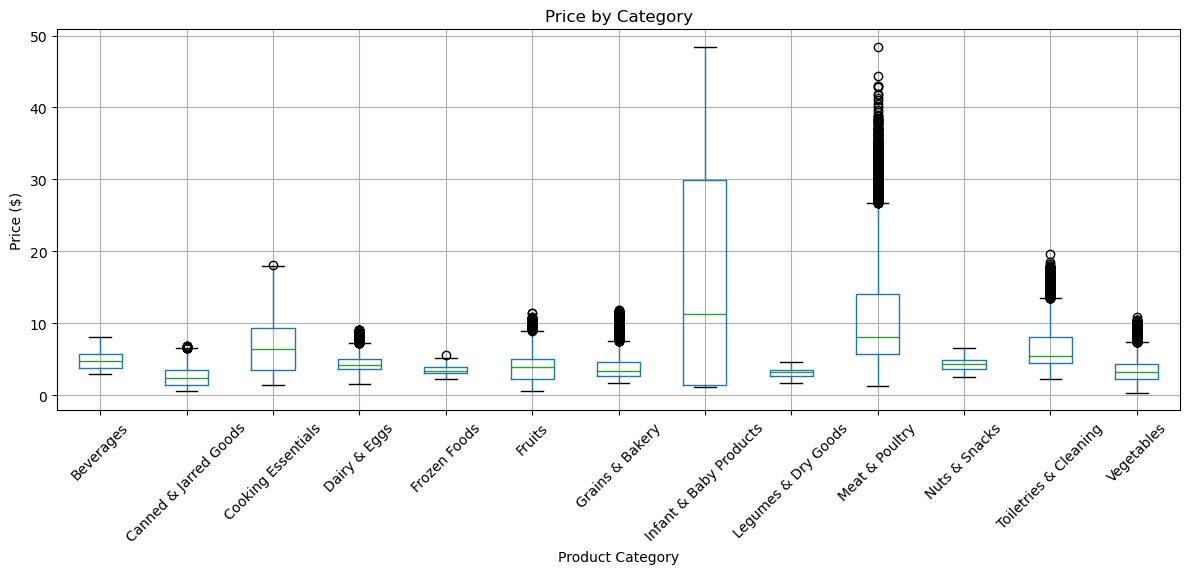

In [12]:
#Price Distribution by Category (Boxplot)
df.boxplot(column="VALUE", by="Product Category", figsize=(12,6), rot=45)
plt.title("Price by Category")
plt.suptitle("")  # removes automatic title
plt.xlabel("Product Category")
plt.ylabel("Price ($)")
plt.grid(True)
plt.tight_layout()
plt.savefig("PriceDistributionByCategory.png")
plt.show()

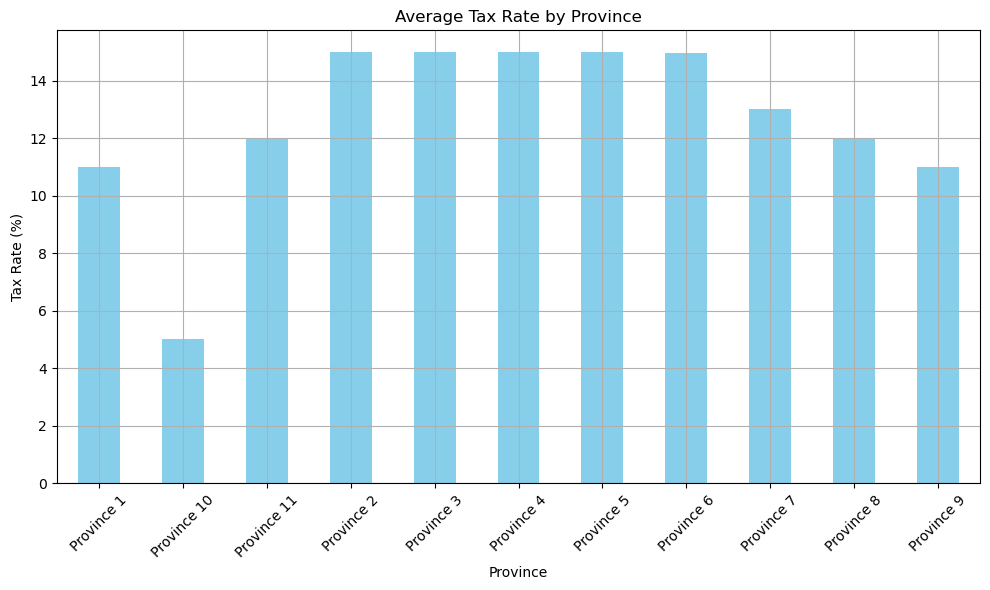

In [13]:
#Tax Rate by Province
df.groupby("GEO")["Total tax rate"].mean().plot(kind="bar", figsize=(10,6), color='skyblue')
plt.title("Average Tax Rate by Province")
plt.xlabel("Province")
plt.ylabel("Tax Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("TaxRateByProvince.png")
plt.show()

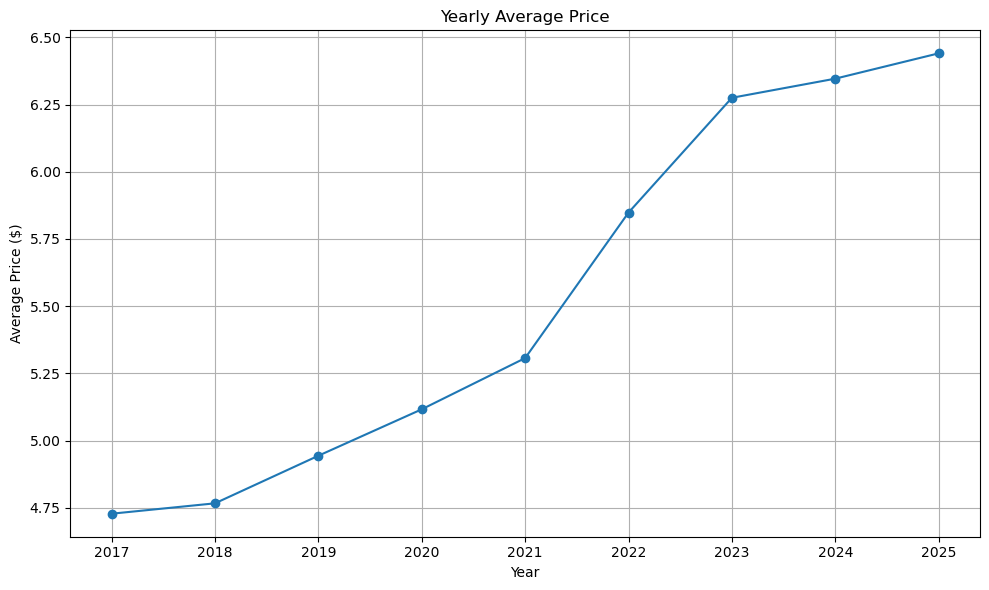

In [14]:
#Average Price Over Time
df.groupby("Year")["VALUE"].mean().plot(marker="o", figsize=(10,6))
plt.title("Yearly Average Price")
plt.xlabel("Year")
plt.ylabel("Average Price ($)")
plt.grid(True)
plt.tight_layout()
plt.savefig("AveragePriceOverTime.png")
plt.show()

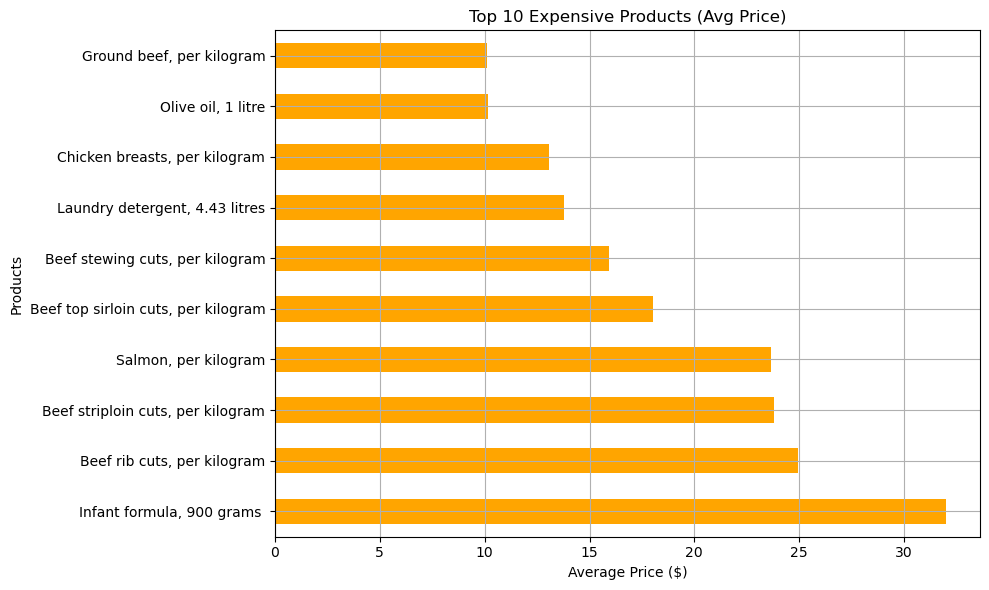

In [16]:
#Top 10 Most Expensive Products (on average)
top_10 = df.groupby("Products")["VALUE"].mean().sort_values(ascending=False).head(10)
top_10.plot(kind="barh", figsize=(10,6), color='orange')
plt.title("Top 10 Expensive Products (Avg Price)")
plt.xlabel("Average Price ($)")
plt.grid(True)
plt.tight_layout()
plt.savefig("TopMostExpensiveItems.png")
plt.show()


**Linear Regression Model**

        Actual Price  Predicted Price
100366          2.96         3.146484
79047           4.38         4.511719
71219           5.97         5.912109
51956           5.89         5.976562
54954          14.95        15.783203
Root Mean Squared Error (RMSE): 1.242684147781828
R² Score: 0.9411814003286939


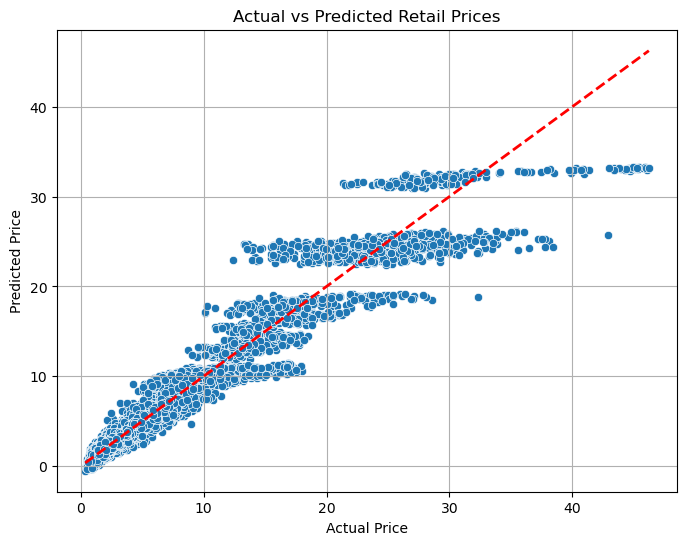

In [17]:
#Define target and features
target = "VALUE"
features = [
    "Year",
    "Month",
    "GEO",
    "Product Category",
    "Products",
    "Taxable",
    "Essential",
    "Total tax rate"
]

# One-hot encode categorical features
df_encoded = pd.get_dummies(df[features], drop_first=True)

# Add target column to encoded dataframe
df_encoded[target] = df[target]

#Train-test split
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 📈Predict and evaluate
y_pred = model.predict(X_test)

# Compare predictions with actual values
comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

# Show first few rows
print(comparison_df.head())

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 =  r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

plt.figure(figsize=(8,6))

# Scatterplot: predicted vs actual
sns.scatterplot(x=y_test, y=y_pred)

# Add perfect prediction line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, linestyle='--')

# Labels and title
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Retail Prices")
plt.grid(True)
plt.savefig("PredictedVSActual.png")
plt.show()
               

**RANDOM FOREST REGRESSION**

In [11]:
# 📌 Random Forest Regression to Predict Retail Prices

# Simpler, faster model configuration
rf_model = RandomForestRegressor(n_estimators=25, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print("🌲 Random Forest Regression Results (Optimized for Speed):")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")


🌲 Random Forest Regression Results (Optimized for Speed):
Root Mean Squared Error (RMSE): 1.3615
R² Score: 0.9294


C:\Users\achar\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
